<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Avaliação N2 
***
Faça os exercícios propostos e em seguida responda ao **questionário no Moodle**.

*Boa prova!*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# **Exercício 1.** Clustering Kmédias, Segmentando Países pela Força de Trabalho 
Questões no Moodle **Q1, Q2, Q3**

Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando uma clusterização **Kmédias**.

In [2]:
import pandas as pd
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [3]:
# seu código
df.describe()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


## Preparação dos dados

Normalize os dados empregando o `StandardScaler` (melhor) ou `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis para a construção do modelo. Para certificar-se que a normalização foi feita corretamente verifique `sum(sum(X))`.

In [4]:
from sklearn.preprocessing import StandardScaler

# seu código
print(df.isnull().sum())
df = df.dropna()

Country    0
Agr        0
Min        0
Man        0
PS         0
Con        0
SI         0
Fin        0
SPS        0
TC         0
dtype: int64


In [5]:
X = df.drop(columns=["Country"])

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X[0:10]


array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

In [6]:
sum(sum(X))

2.275957200481571e-14

## Número de Clusters

**Q1**. Qual ao valor médio de silhueta para o melhor número de clusters `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state=1234` no kmédias e nenhum outro parâmetro.

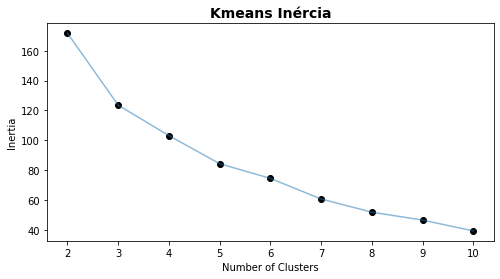

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics 

# seu código
def inercia(X=X, kmin=2, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1234)
      clf.fit(X)
      inertia.append(clf.inertia_)
      
  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(2 , 11) , inertia , 'ko')
  plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,2,10)
plt.show()  

In [8]:
# seu código
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn import metrics

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1234)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))


Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182
Silhueta média para 10 clusters:  0.181


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Sabemos que esse conjunto, independente do valor que você obteve no item anterior é 3. Faça assim a clusterizção para 3 clusters.

**Q2**. Examine quantos elementos você encontra em cada cluster e quais os valores de médios, o centróide ou valores típicos de cada cluster.  

> Empregue `random_state=1234` no kmédias e nenhum outro parâmetro.

In [9]:
from sklearn.cluster import KMeans

# seu código
clf = KMeans(n_clusters = 3 , random_state= 1234)

clf.fit(X)

labels = clf.labels_
centroids = clf.cluster_centers_
df["Cluster"] = labels
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1


In [10]:
df["Cluster"].value_counts()

1    16
2     7
0     3
Name: Cluster, dtype: int64

## Analisando os Grupos



**Q3**. Analise os valores médios dos grupos e os países pertencentes a cada grupo. Há grupos que se destacam com um percentual maior (ou menor) da força de trabalho em alguma categoria? Quais países fazem parte de cada grupo?



In [19]:
# seu código
for i in range(0,3):
  print("Médias do Cluster = ", i,"\n", df[df.Cluster == i].mean(axis=0), "\n")
  print(df["Country"][df.Cluster == i], "\n\n")

Médias do Cluster =  0 
 Agr        52.300000
Min         0.933333
Man        14.100000
PS          0.600000
Con         5.266667
SI          7.700000
Fin         4.933333
SPS         9.400000
TC          4.633333
Cluster     0.000000
dtype: float64 

11        Greece
17        Turkey
25    Yugoslavia
Name: Country, dtype: object 


Médias do Cluster =  1 
 Agr        11.56250
Min         0.81250
Man        27.48125
PS          0.91875
Con         8.61250
SI         16.03125
Fin         5.17500
SPS        22.85000
TC          6.56250
Cluster     1.00000
dtype: float64 

0            Belgium
1            Denmark
2             France
3         W. Germany
4            Ireland
5              Italy
6         Luxembourg
7        Netherlands
8     United Kingdom
9            Austria
10           Finland
12            Norway
13          Portugal
14             Spain
15            Sweden
16       Switzerland
Name: Country, dtype: object 


Médias do Cluster =  2 
 Agr        22.214286
Min      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


# **Exercício 2.** Deep Learning

Questões no Moodle **Q4, Q5, Q6**

A clusterização não é um modelo para previsão do grupo de novos elementos, mas isso não impede de construírmos um modelo neural para 'classificação' de novos dados nos grupos criados se isso for do nosso interesse. 

Construa assim um modelo neural Keras/TensorFlow para classificação dos dados `Eurojobs` para os grupos encontrados (eles serão empregados como o atributo classe).

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report  

In [13]:
print("TF Version: ", tf.__version__)
print("GPU available: ", tf.config.list_physical_devices('GPU')) # havendo disponibilidade o modelo executa empregando GPU

TF Version:  2.9.2
GPU available:  []


In [14]:
#@markdown `plot_loss_acc(history,more_title='')`
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

## Separe os conjuntos de Treinamento e Teste

Você pode empregar os dados `X` antes que já encontram-se normalizados. Para o `y`, lembre-se que você deve fazer o hot enconde para empregá-lo na camada de saída da rede.

Para a separação dos dados de treino e teste empregue os parâmetros fornecidos abaixo.

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# seu código

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['Cluster']])
transformed = hot_encode.transform(df[['Cluster']]).toarray()

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())
display(transformed_df.head())

y = transformed_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


,Cluster_0,Cluster_1,Cluster_2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


## Crie e treine o modelo Keras/TensorFlow

Crie um modelo Keras Sequencial (MLP) que:

1. Emprega duas camadas ocultas ocultas com 64 neurônios cada
2. Todas camadas empregam a função de ativação `relu`, exceto a camada de saída que deve empregar a função `softmax`.

Empregue os demais parâmetros como abaixo.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5,085
Trainable params: 5,085
Non-trainable params: 0
_________________________________________________________________


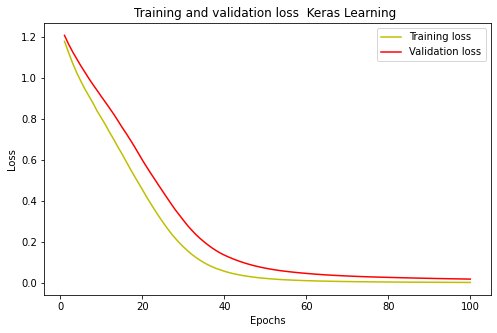

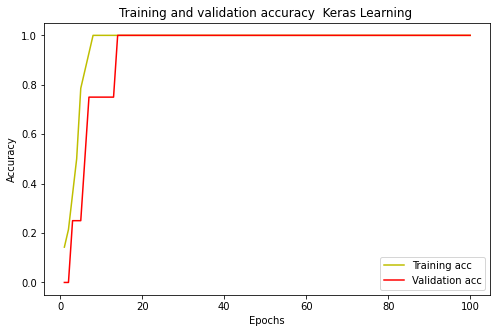

 Keras Learning Accuracy Train: 100.00 %, Accuracy Test: 100.00 %
Test loss: 0.3649730980396271

Test accuracy: 0.875


In [16]:
# seu código

# Neural net config
model = Sequential([layers.Dense(X_train.shape[1], activation="relu", input_shape=[X_train.shape[1],])])
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y_train.shape[1], activation='softmax'))
               

#--------- aqui não requer alterações ------------------------------------------

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Show model
model.summary()

# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=8, verbose=0)

# Plot training
loss, val_loss, acc, val_acc = plot_loss_acc(history,' Keras Learning ')

#--------- aqui não requer alterações ------------------------------------------



# seu código

# Final Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print()
print('Test accuracy:', score[1])

**Q4**. Analise a quantidade de parâmetros (pesos) do seu modelo. 

**Q5**. Repita algumas execuções do modelo (no mínimo 10). O que você pode melhor dizer sobre o resultado obtido no conjunto de teste? 

## Faça uma predição

Empregue um dos modelos com melhores resultados das execuções anteriores e faça a predição dos casos médios de cada cluster (você poderia usar os centróides neste caso não?).

**Q6.** Analise os resultados. 


In [18]:
# seu código
df2 = pd.DataFrame(X)
df2["Cluster"] = labels
df2.head()
cluster_1modelo = pd.DataFrame(df2[df2.Cluster == 0].mean(axis=0))
cluster_1modelo = cluster_1modelo.transpose().drop(columns="Cluster")
#print(cluster_1modelo.head())
print(model.predict(cluster_1modelo), "\n")

cluster_2modelo = pd.DataFrame(df2[df2.Cluster == 1].mean(axis=0))
cluster_2modelo = cluster_2modelo.transpose().drop(columns="Cluster")
#print(cluster_2modelo.head())
print(model.predict(cluster_2modelo), "\n")

cluster_3modelo = pd.DataFrame(df2[df2.Cluster == 2].mean(axis=0))
cluster_3modelo = cluster_3modelo.transpose().drop(columns="Cluster")
#print(cluster_3modelo.head())
print(model.predict(cluster_3modelo), "\n")


1/1 [==============================] - 0s 24ms/step
[[0.97233814 0.02569207 0.00196977]] 

1/1 [==============================] - 0s 16ms/step
[[0.0020171  0.9958092  0.00217372]] 

1/1 [==============================] - 0s 32ms/step
[[3.6187374e-03 3.6524868e-04 9.9601597e-01]] 

